# imports

In [1]:
import sys; sys.path.append('..')

# custom modulos
from modules.plots import plot_confusion_matrix
from modules.split import splitting_train_test
from modules.metrics import metrics, timeMesure

# visualization
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns

# probability
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# general purpose
import pandas as pd
import numpy as np
import joblib

# Reading the dataset

In [2]:
dataset = pd.read_csv('../dataset/processed/SUEE1.csv', index_col=[0,1])

In [3]:
dataset.head()

number_requisitions  \
date                      source_ip                         
1970-01-05 01:38:06+00:00 3232235521             0.607143   
                          3232235529             0.142857   
                          3232235531             0.214286   
                          3232235532             0.000000   
                          3232235547             0.000000   

                                      number_different_destinations  \
date                      source_ip                                   
1970-01-05 01:38:06+00:00 3232235521                       0.545455   
                          3232235529                       0.090909   
                          3232235531                       0.090909   
                          3232235532                       0.090909   
                          3232235547                       0.090909   

                                      mean_frame_length  flag_2  flag_4  \
date                      source_ip                                       
1970-01-05 01:38:06+00:00 3232235521          62.142857    0.50     1.0   
                          3232235529          55.000000    0.25     0.0   
                          3232235531          54.666667    0.25     0.0   
                          3232235532          66.800000    0.00     0.0   
                          3232235547          67.333333    0.00     0.0   

                                      flag_16   flag_17  flag_18  flag_20  \
date                      source_ip                                         
1970-01-05 01:38:06+00:00 3232235521     0.35  0.714286     0.50      0.0   
                          3232235529     0.10  0.000000     0.00      0.0   
                          3232235531     0.15  0.000000     0.00      0.0   
                          3232235532     0.20  0.142857     0.25      0.0   
                          3232235547     0.15  0.142857     0.25      0.0   

                                       flag_24  flag_25  flag_82  flag_144  \
date                      source_ip                                          
1970-01-05 01:38:06+00:00 3232235521  0.529412      0.0      0.0       0.0   
                          3232235529  0.058824      0.0      0.0       0.0   
                          3232235531  0.117647      0.0      0.0       0.0   
                          3232235532  0.235294      0.0      0.0       0.0   
                          3232235547  0.058824      0.0      0.0       0.0   

                                      flag_152  flag_194  y  
date                      source_ip                          
1970-01-05 01:38:06+00:00 3232235521       0.0       0.0  0  
                          3232235529       0.0       0.0  0  
                          3232235531       0.0       0.0  0  
                          3232235532       0.0       0.0  0  
                          3232235547       0.0       0.0  0

## Correlation

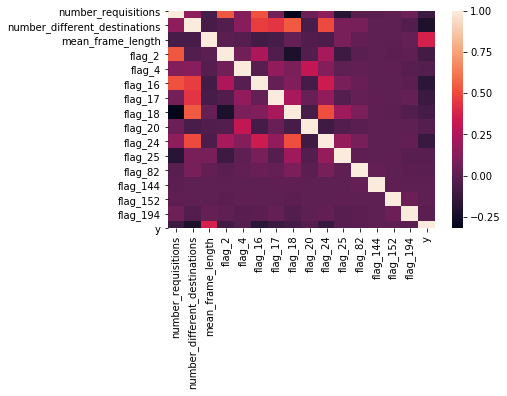

In [4]:
sns.heatmap(dataset.corr());

In [5]:
dataset.y.value_counts(normalize=False)

0    223921
1      5403
Name: y, dtype: int64

# Splitting into train and test

In [6]:
X_train, X_test, y_train, y_test = splitting_train_test(dataset)

In [7]:
y_test.value_counts(normalize=False)

0    44784
1     1081
Name: y, dtype: int64

In [10]:
y_test.shape

(45865,)

# Results
## Loading the trained classifiers

In [8]:
svm_lin = joblib.load('../classifiers/svm_lin_4.plk')
svm_rbf = joblib.load('../classifiers/svm_rbf_2.plk')
svm_pol = joblib.load('../classifiers/svm_poly.plk')
svm_sig = joblib.load('../classifiers/svm_sig.plk')

In [38]:
classifiers = [svm_lin, svm_rbf, svm_sig, svm_pol]

In [39]:
results = metrics(classifiers, X_test, y_test)

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



In [40]:
results

,Acurácia balanceada,Precisão,Recall,F1,Tempo,Desvio Tempo
Linear,0.870950,0.829218,0.745606,0.785192,0.0027,0.0015
RBF,0.980913,0.989534,0.962072,0.975610,6.1550,0.1461
Sigmoid,0.500000,0.000000,0.000000,0.000000,21.2930,3.5455
Poly,0.965221,0.992110,0.930620,0.960382,4.3814,0.2843


In [41]:
results.to_csv('../results/metrics.csv')

# Confusion Matrix

## predicting

In [14]:
y_pred_lin = svm_lin.predict(X_test)

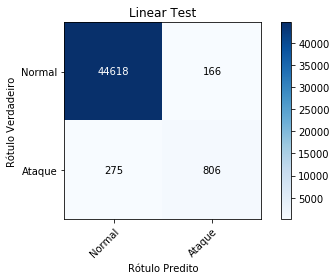

In [17]:
fig, ax = plt.subplots()

plot_confusion_matrix(y_test, y_pred_lin, fig, ax, 
                      np.array(['Normal', 'Ataque']), 
                      normalize=False, 
                      title='Linear Test')
plt.savefig('../visualization/linear.svg')
plt.show()

In [18]:
y_pred_rbf = svm_rbf.predict(X_test)

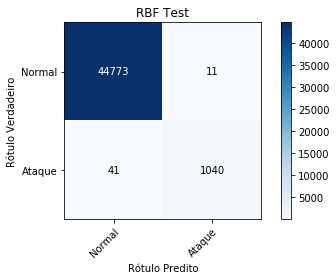

In [20]:
fig, ax = plt.subplots()

plot_confusion_matrix(y_test, y_pred_rbf, fig, ax, 
                      np.array(['Normal', 'Ataque']), 
                      normalize=False, 
                      title='RBF Test')
plt.savefig('../visualization/rbf.svg')
plt.show()

In [21]:
y_pred_sig = svm_sig.predict(X_test)

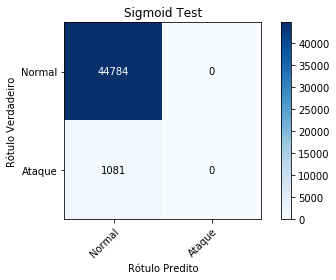

In [23]:
fig, ax = plt.subplots()

plot_confusion_matrix(y_test, y_pred_sig, fig, ax, 
                      np.array(['Normal', 'Ataque']), 
                      normalize=False, 
                      title='Sigmoid Test')
plt.savefig('../visualization/sigmoid.svg')
plt.show()

In [24]:
y_pred_pol = svm_pol.predict(X_test)

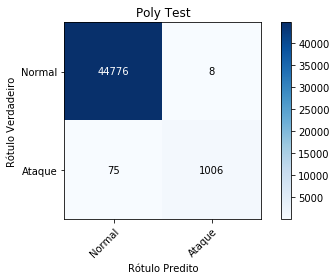

In [25]:
fig, ax = plt.subplots()

plot_confusion_matrix(y_test, y_pred_pol, fig, ax, 
                      np.array(['Normal', 'Ataque']), 
                      normalize=False, 
                      title='Poly Test')
plt.savefig('../visualization/poly.svg')
plt.show()

# ROC Curve

In [26]:
lin_decision_func = cross_val_predict(svm_lin, X_test, y_test, cv=5, 
                                      method='decision_function', 
                                      n_jobs=-1)

In [27]:
rbf_decision_func = cross_val_predict(svm_rbf, X_test, y_test, cv=5, 
                                      method='decision_function', 
                                      n_jobs=-1)

In [28]:
sig_decision_func = cross_val_predict(svm_sig, X_test, y_test, cv=5, 
                                      method='decision_function', 
                                      n_jobs=-1)

In [29]:
pol_decision_func = cross_val_predict(svm_pol, X_test, y_test, cv=5, 
                                      method='decision_function', 
                                      n_jobs=-1)

In [30]:
rbf_fpr, rbf_tpr, _ = roc_curve(y_test, rbf_decision_func)
lin_fpr, lin_tpr, _ = roc_curve(y_test, lin_decision_func)
sig_fpr, sig_tpr, _ = roc_curve(y_test, sig_decision_func)
pol_fpr, pol_tpr, _ = roc_curve(y_test, pol_decision_func)

In [31]:
rbf_auc = roc_auc_score(y_test, rbf_decision_func)
lin_auc = roc_auc_score(y_test, lin_decision_func)
sig_auc = roc_auc_score(y_test, sig_decision_func)
pol_auc = roc_auc_score(y_test, pol_decision_func)

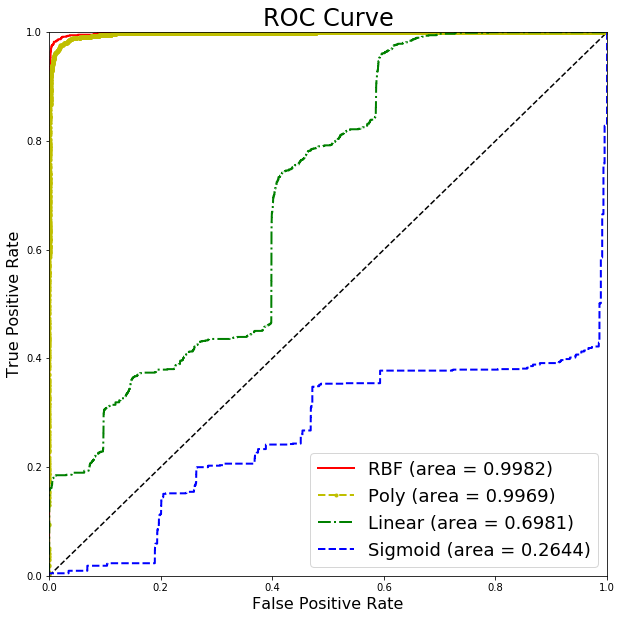

In [44]:
plt.figure(figsize=(10, 10))

plt.plot([0, 1], [0, 1], 'k--')


plt.plot(rbf_fpr, rbf_tpr, 'r-', lw=2, label='RBF (area = %.04f)' % rbf_auc)
plt.plot(pol_fpr, pol_tpr, 'y--.', lw=2, label='Poly (area = %.04f)' % pol_auc)
plt.plot(lin_fpr, lin_tpr, 'g-.', lw=2, label='Linear (area = %.04f)' % lin_auc)
plt.plot(sig_fpr, sig_tpr, 'b--', lw=2, label='Sigmoid (area = %.04f)' % sig_auc)

plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.title("ROC Curve", fontsize=24)
plt.legend(fontsize=18)

plt.savefig('../visualization/roc_curve.svg')
plt.show()